# Seeking trading signal in MD&As with NLP

# Exploring MD&A (Text) Data

In [1]:
# Import package dependencies
import pandas as pd  # for general data wrangling / exploration
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for making plots look good
import os  # since we're working with files
sns.set()  # implementing seaborn chart templates / style

In [2]:
# Get a list of ALL files inside the mda folder
MDA_FILES = os.listdir('../data/mda/')

In [3]:
# Remove the cache file ".DS_Store"
MDA_FILES = [file for file in MDA_FILES if file != '.DS_Store']

In [4]:
# Verifying that the ".DS_Store" is no longer in here.
MDA_FILES

['1001082_MDA_2005-03-16.txt',
 '1001082_MDA_2006-03-15.txt',
 '1001082_MDA_2007-03-01.txt',
 '1001082_MDA_2008-02-26.txt',
 '1001082_MDA_2009-03-02.txt',
 '1001082_MDA_2010-03-01.txt',
 '1001082_MDA_2011-02-24.txt',
 '1001082_MDA_2012-02-23.txt',
 '1001082_MDA_2013-02-20.txt',
 '1001082_MDA_2014-02-21.txt',
 '1001082_MDA_2015-02-23.txt',
 '1001082_MDA_2016-02-18.txt',
 '1001082_MDA_2017-02-22.txt',
 '1001082_MDA_2018-02-21.txt',
 '1001082_MDA_2019-02-13.txt',
 '1002047_MDA_2005-07-08.txt',
 '1002047_MDA_2006-07-12.txt',
 '1002047_MDA_2007-06-26.txt',
 '1002047_MDA_2008-06-24.txt',
 '1002047_MDA_2009-06-17.txt',
 '1002047_MDA_2010-06-18.txt',
 '1002047_MDA_2011-06-23.txt',
 '1002047_MDA_2012-06-19.txt',
 '1002047_MDA_2013-06-17.txt',
 '1002047_MDA_2014-06-17.txt',
 '1002047_MDA_2015-06-12.txt',
 '1002047_MDA_2016-06-22.txt',
 '1002047_MDA_2017-06-20.txt',
 '1002047_MDA_2018-06-19.txt',
 '1002047_MDA_2019-06-18.txt',
 '1035443_MDA_2005-03-16.txt',
 '1035443_MDA_2006-03-16.txt',
 '103544

In [5]:
# Check total file number
len(MDA_FILES)

1364

In [6]:
# Transform the list of mda filenames into a pandas dataframe
df = pd.DataFrame(MDA_FILES)

In [7]:
df.head()

,0
0,1001082_MDA_2005-03-16.txt
1,1001082_MDA_2006-03-15.txt
2,1001082_MDA_2007-03-01.txt
3,1001082_MDA_2008-02-26.txt
4,1001082_MDA_2009-03-02.txt


In [8]:
df.columns = ['file_name']

In [9]:
df.head()

,file_name
0,1001082_MDA_2005-03-16.txt
1,1001082_MDA_2006-03-15.txt
2,1001082_MDA_2007-03-01.txt
3,1001082_MDA_2008-02-26.txt
4,1001082_MDA_2009-03-02.txt


In [10]:

len(df)

1364

In [11]:
df['file_name'][0].split('_')[0]

'1001082'

In [12]:
# Get CIK for each firm
df['cik'] = df['file_name'].apply(lambda x : x.split('_')[0])

In [13]:
df.head()

,file_name,cik
0,1001082_MDA_2005-03-16.txt,1001082
1,1001082_MDA_2006-03-15.txt,1001082
2,1001082_MDA_2007-03-01.txt,1001082
3,1001082_MDA_2008-02-26.txt,1001082
4,1001082_MDA_2009-03-02.txt,1001082


In [14]:
df.tail()

,file_name,cik
1359,98246_MDA_2015-03-20.txt,98246
1360,98246_MDA_2016-03-28.txt,98246
1361,98246_MDA_2017-03-17.txt,98246
1362,98246_MDA_2018-03-16.txt,98246
1363,98246_MDA_2019-03-22.txt,98246


In [15]:
df['file_name'][0]

'1001082_MDA_2005-03-16.txt'

In [16]:
df['file_name'][0].split('_')[2]

'2005-03-16.txt'

In [17]:
# filing date
df['filing_date'] = df['file_name'].apply(lambda x : x.split('_')[2].split('.')[0])

In [18]:
df.head()

,file_name,cik,filing_date
0,1001082_MDA_2005-03-16.txt,1001082,2005-03-16
1,1001082_MDA_2006-03-15.txt,1001082,2006-03-15
2,1001082_MDA_2007-03-01.txt,1001082,2007-03-01
3,1001082_MDA_2008-02-26.txt,1001082,2008-02-26
4,1001082_MDA_2009-03-02.txt,1001082,2009-03-02


In [19]:
# Convert the date strings to pandas timestamps
df['filing_date'] = pd.to_datetime(df['filing_date'], format='%Y-%m-%d')

In [20]:
df.head()

,file_name,cik,filing_date
0,1001082_MDA_2005-03-16.txt,1001082,2005-03-16
1,1001082_MDA_2006-03-15.txt,1001082,2006-03-15
2,1001082_MDA_2007-03-01.txt,1001082,2007-03-01
3,1001082_MDA_2008-02-26.txt,1001082,2008-02-26
4,1001082_MDA_2009-03-02.txt,1001082,2009-03-02


In [21]:
df['filing_date'][0]

Timestamp('2005-03-16 00:00:00')

In [22]:
df.describe()

C:\Users\Adrian\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,file_name,cik,filing_date
count,1364,1364,1364
unique,1364,99,597
top,35527_MDA_2006-02-16.txt,47217,2010-02-26 00:00:00
freq,1,16,20
first,NaN,NaN,2005-01-14 00:00:00
last,NaN,NaN,2019-12-20 00:00:00


<AxesSubplot:xlabel='filing_date'>

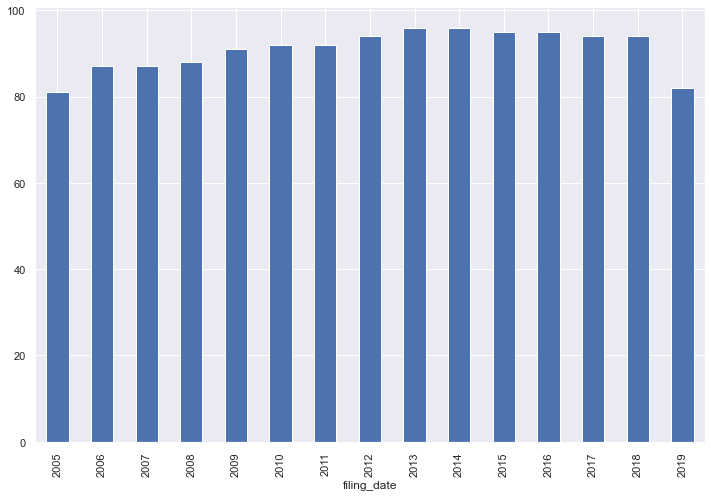

In [23]:

df.groupby(df['filing_date'].dt.year)['cik'].count().plot(kind='bar', figsize=(12, 8))

In [24]:
df['filing_date'].dt.year

0       2005
1       2006
2       2007
3       2008
4       2009
        ... 
1359    2015
1360    2016
1361    2017
1362    2018
1363    2019
Name: filing_date, Length: 1364, dtype: int64

In [25]:

df.groupby(['cik', df['filing_date'].dt.year])['file_name'].count().unstack()

filing_date,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
cik,,,,,,,,,,,,,,,
1001082,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1002047,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1035443,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1037540,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1047862,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92122,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
922224,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
936468,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [26]:
df.groupby(['cik', df['filing_date'].dt.year])['file_name'].count().unstack().describe()

filing_date,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,80.000000,84.000000,87.0,88.0,90.000000,92.0,92.0,94.0,96.0,96.0,95.0,95.0,94.0,94.0,82.0
mean,1.012500,1.035714,1.0,1.0,1.011111,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.111803,0.186691,0.0,0.0,0.105409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,2.000000,2.000000,1.0,1.0,2.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Exploring Stock Price & Returns Data


We are working with stock price data (daily observations of 99 stocks over c.13 years), stored in a csv file from a third party.

In [27]:

df = pd.read_csv('../data/stock_prices.csv')

In [28]:
df.head()

,ticker,date,price
0,CNP,2005-01-03,8.4000
1,CNP,2005-01-04,8.3168
2,CNP,2005-01-05,8.1662
3,CNP,2005-01-06,8.1730
4,CNP,2005-01-07,8.1277


In [29]:
df.tail()

,ticker,date,price
320656,HPQ,2017-11-06,21.44
320657,HPQ,2017-11-07,21.38
320658,HPQ,2017-11-08,21.42
320659,HPQ,2017-11-09,21.34
320660,HPQ,2017-11-10,21.23


In [30]:
# Obtain total # firms
df['ticker'].nunique()

99

In [31]:
df['date'][0]

'2005-01-03'

In [32]:
type(df['date'][0])

str

In [33]:
# Date format from string to timestamp
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [34]:
df['date'][0]

Timestamp('2005-01-03 00:00:00')

In [35]:
# Verify
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [36]:

df['date'].describe()

C:\Users\Adrian\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                  320661
unique                   3239
top       2009-05-29 00:00:00
freq                       99
first     2005-01-03 00:00:00
last      2017-11-10 00:00:00
Name: date, dtype: object

In [37]:
df.head()

,ticker,date,price
0,CNP,2005-01-03,8.4000
1,CNP,2005-01-04,8.3168
2,CNP,2005-01-05,8.1662
3,CNP,2005-01-06,8.1730
4,CNP,2005-01-07,8.1277


In [38]:
df['returns_incorrect'] = df['price'].pct_change(1)
df.head()

,ticker,date,price,returns_incorrect
0,CNP,2005-01-03,8.4000,NaN
1,CNP,2005-01-04,8.3168,-0.009905
2,CNP,2005-01-05,8.1662,-0.018108
3,CNP,2005-01-06,8.1730,0.000833
4,CNP,2005-01-07,8.1277,-0.005543


In [39]:
df.iloc[3230:3250]

,ticker,date,price,returns_incorrect
3230,CNP,2017-10-31,29.580,0.003733
3231,CNP,2017-11-01,29.710,0.004395
3232,CNP,2017-11-02,29.740,0.001010
3233,CNP,2017-11-03,29.590,-0.005044
3234,CNP,2017-11-06,29.720,0.004393
3235,CNP,2017-11-07,29.950,0.007739
3236,CNP,2017-11-08,29.950,0.000000
3237,CNP,2017-11-09,29.810,-0.004674
3238,CNP,2017-11-10,29.410,-0.013418
3239,CLX,2005-01-03,47.794,0.625094


In [40]:
df['returns'] = df.groupby('ticker')['price'].pct_change(1)

In [41]:
df.head()

,ticker,date,price,returns_incorrect,returns
0,CNP,2005-01-03,8.4000,NaN,NaN
1,CNP,2005-01-04,8.3168,-0.009905,-0.009905
2,CNP,2005-01-05,8.1662,-0.018108,-0.018108
3,CNP,2005-01-06,8.1730,0.000833,0.000833
4,CNP,2005-01-07,8.1277,-0.005543,-0.005543


In [42]:
df.iloc[3230:3250]

,ticker,date,price,returns_incorrect,returns
3230,CNP,2017-10-31,29.580,0.003733,0.003733
3231,CNP,2017-11-01,29.710,0.004395,0.004395
3232,CNP,2017-11-02,29.740,0.001010,0.001010
3233,CNP,2017-11-03,29.590,-0.005044,-0.005044
3234,CNP,2017-11-06,29.720,0.004393,0.004393
3235,CNP,2017-11-07,29.950,0.007739,0.007739
3236,CNP,2017-11-08,29.950,0.000000,0.000000
3237,CNP,2017-11-09,29.810,-0.004674,-0.004674
3238,CNP,2017-11-10,29.410,-0.013418,-0.013418
3239,CLX,2005-01-03,47.794,0.625094,NaN


In [43]:
# Delete returns_incorrect
df.drop(columns=['returns_incorrect'], inplace=True)

In [44]:
df.head()

,ticker,date,price,returns
0,CNP,2005-01-03,8.4000,NaN
1,CNP,2005-01-04,8.3168,-0.009905
2,CNP,2005-01-05,8.1662,-0.018108
3,CNP,2005-01-06,8.1730,0.000833
4,CNP,2005-01-07,8.1277,-0.005543


In [45]:
df.groupby('ticker')['returns'].describe()

,count,mean,std,min,25%,50%,75%,max
ticker,,,,,,,,
A,3238.0,0.000636,0.019859,-0.110166,-0.008437,0.000763,0.010311,0.148435
ADBE,3238.0,0.000763,0.020776,-0.190346,-0.008654,0.000676,0.010372,0.143581
AES,3238.0,0.000228,0.023373,-0.157206,-0.010418,0.000477,0.010958,0.282877
AKAM,3201.0,0.000918,0.029074,-0.253120,-0.011140,0.000463,0.013407,0.240354
ALK,3201.0,0.001077,0.028163,-0.185932,-0.012498,0.000849,0.014608,0.312808
...,...,...,...,...,...,...,...,...
VIAB,1494.0,-0.000082,0.018713,-0.214829,-0.008356,0.000521,0.009426,0.138521
VZ,3238.0,0.000215,0.013150,-0.080788,-0.006447,0.000290,0.006883,0.146435
WCG,3201.0,0.001231,0.033712,-0.629504,-0.011004,0.001294,0.014254,0.240164


In [49]:

df.set_index('date', inplace=True)


# Cleaning Text Data

The data comprises of text (.txt) files  in a folder `mda`
Each file relates to the MD&A section for a given firm and a a given year

In [52]:
import nltk
nltk.download('stopwords')
nltk.download('opinion_lexicon')

import os 
import random  # choosing 1 file from all files, randomly 
from nltk.corpus import stopwords  # get stopwords - English

random.seed(1)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adrian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\Adrian\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [53]:
# Get a list of all MD&A files
MDA_FILES = os.listdir("../data/mda/")

# Remove cache file from list of files
MDA_FILES = [file for file in MDA_FILES if file != ".DS_Store"]  

In [54]:
# Choose a single file randomly (get index value randomly)
random_file_idx = random.randint(1, len(MDA_FILES))

In [55]:
random_file_idx

276

In [56]:
# File we'll work with
MDA_FILES[random_file_idx]

'1279363_MDA_2019-02-12.txt'

In [57]:
# Extract text / read text from within file
with open(f"../data/mda/{MDA_FILES[random_file_idx]}") as file:
    mda_text = file.read()

In [58]:
mda_text

'CIK: 1279363\nCompany Name: WELLCARE HEALTH PLANS INC \nSection: MD&A\nFiling Date: 2019-02-12\n\n\nItem 7. Management\'s Discussion and Analysis of Financial Condition and Results of Operations. The following discussion and analysis of our financial condition and results of operations should be read in conjunction with Item 6 Selected Financial Data and our consolidated financial statements and related notes appearing elsewhere in this 2018 Form 10-K. The following discussion contains forward-looking statements that involve risks, uncertainties and assumptions that could cause our actual results to differ materially from management\'s expectations. Factors that could cause such differences include those set forth under Part I, Item 1 Business and Part I, Item 1A Risk Factors , as well as Forward-Looking Statements discussed earlier in this 2018 Form 10-K. OVERVIEW Introduction WellCare Health Plans, Inc. (the "Company," "we," "us," "our") focuses primarily on providing government-spo

In [59]:
# Extract "words" from within the text file
# Note that strictly speaking, splitting on white space doesn't necessarily mean you only get words.
# You may also get numbers, dates, or punctuation marks
words = mda_text.split()

In [60]:
words

['CIK:',
 '1279363',
 'Company',
 'Name:',
 'WELLCARE',
 'HEALTH',
 'PLANS',
 'INC',
 'Section:',
 'MD&A',
 'Filing',
 'Date:',
 '2019-02-12',
 'Item',
 '7.',
 "Management's",
 'Discussion',
 'and',
 'Analysis',
 'of',
 'Financial',
 'Condition',
 'and',
 'Results',
 'of',
 'Operations.',
 'The',
 'following',
 'discussion',
 'and',
 'analysis',
 'of',
 'our',
 'financial',
 'condition',
 'and',
 'results',
 'of',
 'operations',
 'should',
 'be',
 'read',
 'in',
 'conjunction',
 'with',
 'Item',
 '6',
 'Selected',
 'Financial',
 'Data',
 'and',
 'our',
 'consolidated',
 'financial',
 'statements',
 'and',
 'related',
 'notes',
 'appearing',
 'elsewhere',
 'in',
 'this',
 '2018',
 'Form',
 '10-K.',
 'The',
 'following',
 'discussion',
 'contains',
 'forward-looking',
 'statements',
 'that',
 'involve',
 'risks,',
 'uncertainties',
 'and',
 'assumptions',
 'that',
 'could',
 'cause',
 'our',
 'actual',
 'results',
 'to',
 'differ',
 'materially',
 'from',
 "management's",
 'expectations.

In [61]:
# Get the subset of "words" which are alphabetic (ignore numericals, symbols, etc)
alphabetic_only = [word for word in words if word.isalpha()]

In [62]:
alphabetic_only

['Company',
 'WELLCARE',
 'HEALTH',
 'PLANS',
 'INC',
 'Filing',
 'Item',
 'Discussion',
 'and',
 'Analysis',
 'of',
 'Financial',
 'Condition',
 'and',
 'Results',
 'of',
 'The',
 'following',
 'discussion',
 'and',
 'analysis',
 'of',
 'our',
 'financial',
 'condition',
 'and',
 'results',
 'of',
 'operations',
 'should',
 'be',
 'read',
 'in',
 'conjunction',
 'with',
 'Item',
 'Selected',
 'Financial',
 'Data',
 'and',
 'our',
 'consolidated',
 'financial',
 'statements',
 'and',
 'related',
 'notes',
 'appearing',
 'elsewhere',
 'in',
 'this',
 'Form',
 'The',
 'following',
 'discussion',
 'contains',
 'statements',
 'that',
 'involve',
 'uncertainties',
 'and',
 'assumptions',
 'that',
 'could',
 'cause',
 'our',
 'actual',
 'results',
 'to',
 'differ',
 'materially',
 'from',
 'Factors',
 'that',
 'could',
 'cause',
 'such',
 'differences',
 'include',
 'those',
 'set',
 'forth',
 'under',
 'Part',
 'Item',
 'Business',
 'and',
 'Part',
 'Item',
 'Risk',
 'Factors',
 'as',
 'wel

In [63]:
# Harmonise text: convert all words to lower case
lower_case_only = [word.lower() for word in alphabetic_only]

In [64]:
lower_case_only

['company',
 'wellcare',
 'health',
 'plans',
 'inc',
 'filing',
 'item',
 'discussion',
 'and',
 'analysis',
 'of',
 'financial',
 'condition',
 'and',
 'results',
 'of',
 'the',
 'following',
 'discussion',
 'and',
 'analysis',
 'of',
 'our',
 'financial',
 'condition',
 'and',
 'results',
 'of',
 'operations',
 'should',
 'be',
 'read',
 'in',
 'conjunction',
 'with',
 'item',
 'selected',
 'financial',
 'data',
 'and',
 'our',
 'consolidated',
 'financial',
 'statements',
 'and',
 'related',
 'notes',
 'appearing',
 'elsewhere',
 'in',
 'this',
 'form',
 'the',
 'following',
 'discussion',
 'contains',
 'statements',
 'that',
 'involve',
 'uncertainties',
 'and',
 'assumptions',
 'that',
 'could',
 'cause',
 'our',
 'actual',
 'results',
 'to',
 'differ',
 'materially',
 'from',
 'factors',
 'that',
 'could',
 'cause',
 'such',
 'differences',
 'include',
 'those',
 'set',
 'forth',
 'under',
 'part',
 'item',
 'business',
 'and',
 'part',
 'item',
 'risk',
 'factors',
 'as',
 'wel

In [65]:
# List of the most common words in the English language
stopwords_nltk = set(stopwords.words('english'))

In [66]:
stopwords_nltk

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [67]:
# Final cleaning step: get rid of stopwords
cleaned_words = [word for word in lower_case_only if word not in stopwords_nltk]

In [68]:
cleaned_words

['company',
 'wellcare',
 'health',
 'plans',
 'inc',
 'filing',
 'item',
 'discussion',
 'analysis',
 'financial',
 'condition',
 'results',
 'following',
 'discussion',
 'analysis',
 'financial',
 'condition',
 'results',
 'operations',
 'read',
 'conjunction',
 'item',
 'selected',
 'financial',
 'data',
 'consolidated',
 'financial',
 'statements',
 'related',
 'notes',
 'appearing',
 'elsewhere',
 'form',
 'following',
 'discussion',
 'contains',
 'statements',
 'involve',
 'uncertainties',
 'assumptions',
 'could',
 'cause',
 'actual',
 'results',
 'differ',
 'materially',
 'factors',
 'could',
 'cause',
 'differences',
 'include',
 'set',
 'forth',
 'part',
 'item',
 'business',
 'part',
 'item',
 'risk',
 'factors',
 'well',
 'statements',
 'discussed',
 'earlier',
 'form',
 'overview',
 'introduction',
 'wellcare',
 'health',
 'focuses',
 'primarily',
 'providing',
 'managed',
 'care',
 'services',
 'seniors',
 'individuals',
 'complex',
 'medical',
 'primarily',
 'medicare',


In [69]:
# Explore *approximate* number of "words" before cleaning
len(words)

18001

In [70]:
# Explore number of words after cleaning
len(cleaned_words)

8494

# Estimating Sentiment
In this part, I estimate sentiment for one firm at a time.

In [71]:
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
import seaborn as sns
sns.set()
random.seed(1)

In [72]:
MDA_FILES = os.listdir("../data/mda/")
MDA_FILES = [file for file in MDA_FILES if file != ".DS_Store"]
random_file_idx = random.randint(1, len(MDA_FILES))

random_file = MDA_FILES[random_file_idx]
print(f"File we worked with (single firm case): {random_file}")

File we worked with (single firm case): 1279363_MDA_2019-02-12.txt


In [73]:
def clean_my_text(mda_file):
    """Returns cleaned text data."""
    stopwords_nltk = set(stopwords.words('english'))

    with open(mda_file) as file:
        mda_text = file.read()
    
    words = mda_text.split()
    cleaned_words = [word.lower() for word in words if word.isalpha()]
    cleaned_words = [word for word in cleaned_words if word not in stopwords_nltk]
    
    return cleaned_words

In [74]:
# Positive and negative lexicons from opinion_lexicon
positive_lexicon = set(opinion_lexicon.positive())
negative_lexicon = set(opinion_lexicon.negative())

In [75]:
cleaned_words = clean_my_text(f"../data/mda/{random_file}")

positive_sentiment = 0
negative_sentiment = 0
for word in cleaned_words:
    if word in positive_lexicon:
        positive_sentiment += 1
    elif word in negative_lexicon:
        negative_sentiment += 1

phi_pos = positive_sentiment / len(cleaned_words)
phi_neg = negative_sentiment / len(cleaned_words)

phi_npt = (phi_pos - phi_neg) / (phi_pos + phi_neg)

In [76]:
print(f"""\
Positive Sentiment (ϕ_pos) == {phi_pos}
Negative Sentiment (ϕ_neg) == {phi_neg}
Net Positive Tone (ϕ_npt) == {phi_npt}\
""")

Positive Sentiment (ϕ_pos) == 0.04144101718860372
Negative Sentiment (ϕ_neg) == 0.02013185778196374
Net Positive Tone (ϕ_npt) == 0.34608030592734224


# Estimating Sentiment 2
In this part, we we estimate sentiment for all firms in one go.

In [77]:

sentiment_scores = {}
error_files = {}
for file in MDA_FILES:
    cleaned_words = clean_my_text(f"../data/mda/{file}")

    positive_sentiment = 0
    negative_sentiment = 0
    for word in cleaned_words:
        if word in positive_lexicon:
            positive_sentiment += 1
        elif word in negative_lexicon:
            negative_sentiment += 1

    phi_pos = positive_sentiment / len(cleaned_words)
    phi_neg = negative_sentiment / len(cleaned_words)

    try:
        phi_npt = (phi_pos - phi_neg) / (phi_pos + phi_neg)
    except ZeroDivisionError:
        error_files[file] = len(cleaned_words)
    
    sentiment_scores[file] = [phi_pos, phi_neg, phi_npt]

In [78]:
# files with poor data
len(error_files)

193

In [1]:
error_files

NameError: name 'error_files' is not defined

In [82]:
sentiment_scores = {}

for file in MDA_FILES:
    cleaned_words = clean_my_text(f"../data/mda/{file}")
    positive_sentiment = 0
    negative_sentiment = 0
    
    # Only files with > 100 words after cleaning
    if len(cleaned_words) >= 100:
        for word in cleaned_words:
            if word in positive_lexicon:
                positive_sentiment += 1
            elif word in negative_lexicon:
                negative_sentiment += 1
        
        # proportions of sentiment
        phi_pos = positive_sentiment / len(cleaned_words)
        phi_neg = negative_sentiment / len(cleaned_words)

        phi_npt = (phi_pos - phi_neg) / (phi_pos + phi_neg)

        sentiment_scores[file] = [phi_pos, phi_neg, phi_npt, len(cleaned_words)]
    
    else: 
        pass


In [83]:
# Explore sentiment scores
sentiment_scores

{'1001082_MDA_2005-03-16.txt': [0.045112781954887216,
  0.041353383458646614,
  0.043478260869565216,
  798],
 '1001082_MDA_2006-03-15.txt': [0.055930568948891035,
  0.04532304725168756,
  0.1047619047619048,
  1037],
 '1001082_MDA_2007-03-01.txt': [0.03503184713375796,
  0.009554140127388535,
  0.5714285714285715,
  314],
 '1001082_MDA_2008-02-26.txt': [0.0587467362924282,
  0.05483028720626632,
  0.03448275862068964,
  766],
 '1001082_MDA_2009-03-02.txt': [0.05491990846681922,
  0.043478260869565216,
  0.11627906976744186,
  437],
 '1001082_MDA_2010-03-01.txt': [0.0379746835443038,
  0.04746835443037975,
  -0.11111111111111112,
  632],
 '1001082_MDA_2011-02-24.txt': [0.03460207612456748,
  0.03011662181212354,
  0.06930693069306935,
  7803],
 '1001082_MDA_2012-02-23.txt': [0.04186795491143317,
  0.040257648953301126,
  0.019607843137254905,
  621],
 '1001082_MDA_2013-02-20.txt': [0.04318181818181818,
  0.05,
  -0.0731707317073171,
  440],
 '1001082_MDA_2014-02-21.txt': [0.04339250493

In [84]:
df_scores = pd.DataFrame(sentiment_scores).T

In [85]:
df_scores.head()

,0,1,2,3
1001082_MDA_2005-03-16.txt,0.045113,0.041353,0.043478,798.0
1001082_MDA_2006-03-15.txt,0.055931,0.045323,0.104762,1037.0
1001082_MDA_2007-03-01.txt,0.035032,0.009554,0.571429,314.0
1001082_MDA_2008-02-26.txt,0.058747,0.054830,0.034483,766.0
1001082_MDA_2009-03-02.txt,0.054920,0.043478,0.116279,437.0


In [86]:
df_scores.reset_index(inplace=True)
df_scores.head()

,index,0,1,2,3
0,1001082_MDA_2005-03-16.txt,0.045113,0.041353,0.043478,798.0
1,1001082_MDA_2006-03-15.txt,0.055931,0.045323,0.104762,1037.0
2,1001082_MDA_2007-03-01.txt,0.035032,0.009554,0.571429,314.0
3,1001082_MDA_2008-02-26.txt,0.058747,0.054830,0.034483,766.0
4,1001082_MDA_2009-03-02.txt,0.054920,0.043478,0.116279,437.0


In [87]:
df_scores.columns = ['file_name', 'phi_pos', 'phi_neg', 'phi_npt', 'num_cleaned_words']

In [88]:
df_scores.head()

,file_name,phi_pos,phi_neg,phi_npt,num_cleaned_words
0,1001082_MDA_2005-03-16.txt,0.045113,0.041353,0.043478,798.0
1,1001082_MDA_2006-03-15.txt,0.055931,0.045323,0.104762,1037.0
2,1001082_MDA_2007-03-01.txt,0.035032,0.009554,0.571429,314.0
3,1001082_MDA_2008-02-26.txt,0.058747,0.054830,0.034483,766.0
4,1001082_MDA_2009-03-02.txt,0.054920,0.043478,0.116279,437.0


<AxesSubplot:>

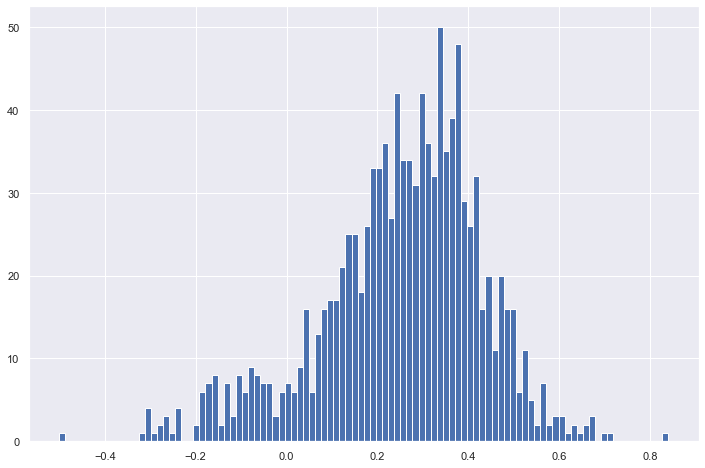

In [89]:
df_scores['phi_npt'].hist(figsize=(12, 8), bins=100)

# Estimating Sentiment 3

Re-run using Document Term Matrix (DTM).

In [90]:
import pandas as pd
import os
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon

from sklearn.feature_extraction.text import CountVectorizer

In [91]:
def clean_text_str(text_str):
    """Returns a list of cleaned words for a given text string."""
    nltk_stopwords = set(stopwords.words('english'))
    words = text_str.split()
    words = [word.lower() for word in words if word.isalpha()]
    cleaned_words = [word for word in words if word not in nltk_stopwords]
    
    return cleaned_words

In [92]:
MDA_FILES = os.listdir('../data/mda/')
MDA_FILES = [file for file in MDA_FILES if file != ".DS_Store"]

In [93]:
positive_lexicon = opinion_lexicon.positive()

In [94]:
mda_text = {}
for file in MDA_FILES:
    cik = file.split('_')[0]
    filing_date = file.split('_')[2].split('.')[0]
    cik_filing_date = cik + '_' + filing_date  
    
    with open('../data/mda/' + file) as f:
        text = f.read()
    
    mda_text[cik_filing_date] = text

In [95]:
df_text = pd.DataFrame(mda_text, index=['text']).T
df_text.reset_index(inplace=True)
df_text.columns = ['cik_filing_date', 'mda_text']

df_text['cik'] = df_text['cik_filing_date'].apply(lambda x: x.split('_')[0])
df_text['cik'] = pd.to_numeric(df_text['cik'])

df_text['filing_date'] = df_text['cik_filing_date'].apply(lambda x: x.split('_')[1])
df_text['filing_date'] = pd.to_datetime(df_text['filing_date'], format='%Y-%m-%d')

df_text.drop(columns=['cik_filing_date'], inplace=True)
df_text = df_text[['cik', 'filing_date', 'mda_text']] 

In [96]:
df_text.head()

,cik,filing_date,mda_text
0,1001082,2005-03-16,CIK: 1001082\nCompany Name: ECHOSTAR COMMUNICA...
1,1001082,2006-03-15,CIK: 1001082\nCompany Name: ECHOSTAR COMMUNICA...
2,1001082,2007-03-01,CIK: 1001082\nCompany Name: ECHOSTAR COMMUNICA...
3,1001082,2008-02-26,CIK: 1001082\nCompany Name: DISH NETWORK CORP\...
4,1001082,2009-03-02,CIK: 1001082\nCompany Name: DISH NETWORK CORP\...


In [97]:
len(df_text)

1364

In [98]:
df_text['mda_text_clean'] = df_text['mda_text'].apply(clean_text_str)

In [99]:
df_text.head()

,cik,filing_date,mda_text,mda_text_clean
0,1001082,2005-03-16,CIK: 1001082\nCompany Name: ECHOSTAR COMMUNICA...,"[company, echostar, communications, corp, fili..."
1,1001082,2006-03-15,CIK: 1001082\nCompany Name: ECHOSTAR COMMUNICA...,"[company, echostar, communications, corp, fili..."
2,1001082,2007-03-01,CIK: 1001082\nCompany Name: ECHOSTAR COMMUNICA...,"[company, echostar, communications, corp, fili..."
3,1001082,2008-02-26,CIK: 1001082\nCompany Name: DISH NETWORK CORP\...,"[company, dish, network, corp, filing, item, m..."
4,1001082,2009-03-02,CIK: 1001082\nCompany Name: DISH NETWORK CORP\...,"[company, dish, network, corp, filing, item, m..."


In [100]:
df_text['num_cleaned_words'] = df_text['mda_text_clean'].apply(lambda x: len(x))

In [101]:
df_text.head()

,cik,filing_date,mda_text,mda_text_clean,num_cleaned_words
0,1001082,2005-03-16,CIK: 1001082\nCompany Name: ECHOSTAR COMMUNICA...,"[company, echostar, communications, corp, fili...",798
1,1001082,2006-03-15,CIK: 1001082\nCompany Name: ECHOSTAR COMMUNICA...,"[company, echostar, communications, corp, fili...",1037
2,1001082,2007-03-01,CIK: 1001082\nCompany Name: ECHOSTAR COMMUNICA...,"[company, echostar, communications, corp, fili...",314
3,1001082,2008-02-26,CIK: 1001082\nCompany Name: DISH NETWORK CORP\...,"[company, dish, network, corp, filing, item, m...",766
4,1001082,2009-03-02,CIK: 1001082\nCompany Name: DISH NETWORK CORP\...,"[company, dish, network, corp, filing, item, m...",437


In [102]:
df_text['mda_text_clean_str'] = df_text['mda_text_clean'].apply(lambda x: " ".join(x))

In [103]:
df_text.head()

,cik,filing_date,mda_text,mda_text_clean,num_cleaned_words,mda_text_clean_str
0,1001082,2005-03-16,CIK: 1001082\nCompany Name: ECHOSTAR COMMUNICA...,"[company, echostar, communications, corp, fili...",798,company echostar communications corp filing it...
1,1001082,2006-03-15,CIK: 1001082\nCompany Name: ECHOSTAR COMMUNICA...,"[company, echostar, communications, corp, fili...",1037,company echostar communications corp filing it...
2,1001082,2007-03-01,CIK: 1001082\nCompany Name: ECHOSTAR COMMUNICA...,"[company, echostar, communications, corp, fili...",314,company echostar communications corp filing it...
3,1001082,2008-02-26,CIK: 1001082\nCompany Name: DISH NETWORK CORP\...,"[company, dish, network, corp, filing, item, m...",766,company dish network corp filing item manageme...
4,1001082,2009-03-02,CIK: 1001082\nCompany Name: DISH NETWORK CORP\...,"[company, dish, network, corp, filing, item, m...",437,company dish network corp filing item manageme...


In [104]:
count_vec = CountVectorizer(vocabulary=positive_lexicon)

In [105]:
dtm_pos_words = count_vec.fit_transform(df_text['mda_text_clean_str'])

In [106]:
dtm_pos_words

<1364x2006 sparse matrix of type '<class 'numpy.int64'>'
	with 78751 stored elements in Compressed Sparse Row format>

In [107]:
dtm_pos_words.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [108]:
df_dtm_pos_words = pd.DataFrame(dtm_pos_words.toarray())

In [109]:
df_dtm_pos_words.head()

,0,1,2,3,4,5,6,7,8,9,...,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
df_dtm_pos_words.columns = count_vec.vocabulary_.keys()

In [111]:
df_dtm_pos_words.head()

,a+,abound,abounds,abundance,abundant,accessable,accessible,acclaim,acclaimed,acclamation,...,wow,wowed,wowing,wows,yay,youthful,zeal,zenith,zest,zippy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
len(df_dtm_pos_words)

1364

In [113]:
df_dtm_pos_words.sum(axis=1)

0        36
1        58
2        11
3        45
4        24
       ... 
1359    188
1360    197
1361    228
1362    236
1363    213
Length: 1364, dtype: int64

In [114]:
df_text['positive_count'] = df_dtm_pos_words.sum(axis=1)

In [115]:
df_text.head()

,cik,filing_date,mda_text,mda_text_clean,num_cleaned_words,mda_text_clean_str,positive_count
0,1001082,2005-03-16,CIK: 1001082\nCompany Name: ECHOSTAR COMMUNICA...,"[company, echostar, communications, corp, fili...",798,company echostar communications corp filing it...,36
1,1001082,2006-03-15,CIK: 1001082\nCompany Name: ECHOSTAR COMMUNICA...,"[company, echostar, communications, corp, fili...",1037,company echostar communications corp filing it...,58
2,1001082,2007-03-01,CIK: 1001082\nCompany Name: ECHOSTAR COMMUNICA...,"[company, echostar, communications, corp, fili...",314,company echostar communications corp filing it...,11
3,1001082,2008-02-26,CIK: 1001082\nCompany Name: DISH NETWORK CORP\...,"[company, dish, network, corp, filing, item, m...",766,company dish network corp filing item manageme...,45
4,1001082,2009-03-02,CIK: 1001082\nCompany Name: DISH NETWORK CORP\...,"[company, dish, network, corp, filing, item, m...",437,company dish network corp filing item manageme...,24


In [116]:
df_text['phi_pos'] = df_text['positive_count'] / df_text['num_cleaned_words']

In [117]:
df_text.head()

,cik,filing_date,mda_text,mda_text_clean,num_cleaned_words,mda_text_clean_str,positive_count,phi_pos
0,1001082,2005-03-16,CIK: 1001082\nCompany Name: ECHOSTAR COMMUNICA...,"[company, echostar, communications, corp, fili...",798,company echostar communications corp filing it...,36,0.045113
1,1001082,2006-03-15,CIK: 1001082\nCompany Name: ECHOSTAR COMMUNICA...,"[company, echostar, communications, corp, fili...",1037,company echostar communications corp filing it...,58,0.055931
2,1001082,2007-03-01,CIK: 1001082\nCompany Name: ECHOSTAR COMMUNICA...,"[company, echostar, communications, corp, fili...",314,company echostar communications corp filing it...,11,0.035032
3,1001082,2008-02-26,CIK: 1001082\nCompany Name: DISH NETWORK CORP\...,"[company, dish, network, corp, filing, item, m...",766,company dish network corp filing item manageme...,45,0.058747
4,1001082,2009-03-02,CIK: 1001082\nCompany Name: DISH NETWORK CORP\...,"[company, dish, network, corp, filing, item, m...",437,company dish network corp filing item manageme...,24,0.054920


In [118]:
# Exclude if <cleaned words
df_text = df_text[df_text['num_cleaned_words'] >= 100]

In [119]:
df_text.head()

,cik,filing_date,mda_text,mda_text_clean,num_cleaned_words,mda_text_clean_str,positive_count,phi_pos
0,1001082,2005-03-16,CIK: 1001082\nCompany Name: ECHOSTAR COMMUNICA...,"[company, echostar, communications, corp, fili...",798,company echostar communications corp filing it...,36,0.045113
1,1001082,2006-03-15,CIK: 1001082\nCompany Name: ECHOSTAR COMMUNICA...,"[company, echostar, communications, corp, fili...",1037,company echostar communications corp filing it...,58,0.055931
2,1001082,2007-03-01,CIK: 1001082\nCompany Name: ECHOSTAR COMMUNICA...,"[company, echostar, communications, corp, fili...",314,company echostar communications corp filing it...,11,0.035032
3,1001082,2008-02-26,CIK: 1001082\nCompany Name: DISH NETWORK CORP\...,"[company, dish, network, corp, filing, item, m...",766,company dish network corp filing item manageme...,45,0.058747
4,1001082,2009-03-02,CIK: 1001082\nCompany Name: DISH NETWORK CORP\...,"[company, dish, network, corp, filing, item, m...",437,company dish network corp filing item manageme...,24,0.054920


In [120]:
# Check vs iterative approach
sentiment_scores = pd.read_csv("../data/sentiment_scores.csv")

In [121]:
sentiment_scores.head()

,file_name,cik,filing_date,phi_pos,phi_neg,phi_npt,num_cleaned_words
0,1037540_MDA_2017-02-28.txt,1037540,2017-02-28,0.036900,0.040590,-0.047619,271.0
1,26172_MDA_2007-02-27.txt,26172,2007-02-27,0.036629,0.017735,0.347548,8627.0
2,87347_MDA_2015-01-29.txt,87347,2015-01-29,0.045608,0.022545,0.338403,3859.0
3,1087423_MDA_2009-04-29.txt,1087423,2009-04-29,0.035301,0.016278,0.368821,5099.0
4,72741_MDA_2009-02-27.txt,72741,2009-02-27,0.039590,0.016269,0.417512,19424.0


# Merging Financial and Sentiment data


In [122]:
df_returns = pd.read_csv("../data/stock_prices_returns.csv")
df_scores = pd.read_csv("../data/sentiment_scores.csv")
df_crosswalk = pd.read_csv("../data/sp500_constituents.csv")

In [123]:
df_returns.head()

,ticker,date,price,returns
0,CNP,2005-01-03,8.4000,NaN
1,CNP,2005-01-04,8.3168,-0.009905
2,CNP,2005-01-05,8.1662,-0.018108
3,CNP,2005-01-06,8.1730,0.000833
4,CNP,2005-01-07,8.1277,-0.005543


In [124]:
df_scores.head()

,file_name,cik,filing_date,phi_pos,phi_neg,phi_npt,num_cleaned_words
0,1037540_MDA_2017-02-28.txt,1037540,2017-02-28,0.036900,0.040590,-0.047619,271.0
1,26172_MDA_2007-02-27.txt,26172,2007-02-27,0.036629,0.017735,0.347548,8627.0
2,87347_MDA_2015-01-29.txt,87347,2015-01-29,0.045608,0.022545,0.338403,3859.0
3,1087423_MDA_2009-04-29.txt,1087423,2009-04-29,0.035301,0.016278,0.368821,5099.0
4,72741_MDA_2009-02-27.txt,72741,2009-02-27,0.039590,0.016269,0.417512,19424.0


In [125]:
df_crosswalk.head()

,Security,Symbol,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,3M Company,MMM,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902
1,Abbott Laboratories,ABT,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31/03/1964,1800,1888
2,AbbVie Inc.,ABBV,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31/12/2012,1551152,2013 (1888)
3,ABIOMED Inc,ABMD,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",31/05/2018,815094,1981
4,Accenture plc,ACN,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06/07/2011,1467373,1989


In [126]:
df_returns['date'] = pd.to_datetime(df_returns['date'], format='%Y-%m-%d')
df_returns.dropna(subset=['returns'], inplace=True)

In [127]:
df_scores['filing_date'] = pd.to_datetime(df_scores['filing_date'], format='%Y-%m-%d')

In [128]:
df_crosswalk = df_crosswalk[['Symbol', 'CIK']]

In [129]:
df_crosswalk.head()

,Symbol,CIK
0,MMM,66740
1,ABT,1800
2,ABBV,1551152
3,ABMD,815094
4,ACN,1467373


In [130]:
df_crosswalk.columns = ['ticker', 'cik']

In [131]:
df_crosswalk.head()

,ticker,cik
0,MMM,66740
1,ABT,1800
2,ABBV,1551152
3,ABMD,815094
4,ACN,1467373


In [132]:
df_returns = df_returns.merge(df_crosswalk, on='ticker', how='inner')

In [133]:
df_returns.head()

,ticker,date,price,returns,cik
0,CNP,2005-01-04,8.3168,-0.009905,1130310
1,CNP,2005-01-05,8.1662,-0.018108,1130310
2,CNP,2005-01-06,8.1730,0.000833,1130310
3,CNP,2005-01-07,8.1277,-0.005543,1130310
4,CNP,2005-01-10,8.1277,0.000000,1130310


In [134]:
df_returns.tail()

,ticker,date,price,returns,cik
302591,HPQ,2017-11-06,21.44,-0.001397,47217
302592,HPQ,2017-11-07,21.38,-0.002799,47217
302593,HPQ,2017-11-08,21.42,0.001871,47217
302594,HPQ,2017-11-09,21.34,-0.003735,47217
302595,HPQ,2017-11-10,21.23,-0.005155,47217


In [135]:
df_master = df_returns.merge(df_scores, left_on=['cik', 'date'],
                            right_on=['cik', 'filing_date'],
                            how='left')

In [136]:
df_master.head()

,ticker,date,price,returns,cik,file_name,filing_date,phi_pos,phi_neg,phi_npt,num_cleaned_words
0,CNP,2005-01-04,8.3168,-0.009905,1130310,NaN,NaT,NaN,NaN,NaN,NaN
1,CNP,2005-01-05,8.1662,-0.018108,1130310,NaN,NaT,NaN,NaN,NaN,NaN
2,CNP,2005-01-06,8.1730,0.000833,1130310,NaN,NaT,NaN,NaN,NaN,NaN
3,CNP,2005-01-07,8.1277,-0.005543,1130310,NaN,NaT,NaN,NaN,NaN,NaN
4,CNP,2005-01-10,8.1277,0.000000,1130310,NaN,NaT,NaN,NaN,NaN,NaN


In [137]:
df_master[df_master['phi_npt'].notnull()]

,ticker,date,price,returns,cik,file_name,filing_date,phi_pos,phi_neg,phi_npt,num_cleaned_words
49,CNP,2005-03-16,9.2306,-0.013551,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0
301,CNP,2006-03-16,9.6470,-0.007714,1130310,1130310_MDA_2006-03-16.txt,2006-03-16,0.033819,0.022748,0.195710,6594.0
540,CNP,2007-02-28,13.5440,-0.001106,1130310,1130310_MDA_2007-02-28.txt,2007-02-28,0.031138,0.021997,0.172043,7001.0
792,CNP,2008-02-28,11.5980,0.001814,1130310,1130310_MDA_2008-02-28.txt,2008-02-28,0.033930,0.022047,0.212276,6985.0
1042,CNP,2009-02-25,7.9907,-0.114447,1130310,1130310_MDA_2009-02-25.txt,2009-02-25,0.034543,0.023719,0.185792,6282.0
...,...,...,...,...,...,...,...,...,...,...,...
301367,HPQ,2012-12-27,5.6096,-0.005778,47217,47217_MDA_2012-12-27.txt,2012-12-27,0.037173,0.028197,0.137324,8689.0
301620,HPQ,2013-12-30,11.4870,-0.004334,47217,47217_MDA_2013-12-30.txt,2013-12-30,0.039027,0.036312,0.036036,8840.0
301865,HPQ,2014-12-18,16.5910,0.030369,47217,47217_MDA_2014-12-18.txt,2014-12-18,0.040528,0.032579,0.108729,8932.0
302115,HPQ,2015-12-16,11.5520,0.004172,47217,47217_MDA_2015-12-16.txt,2015-12-16,0.039710,0.032453,0.100559,9922.0


In [138]:
# Forward fill 
df_master = df_master.groupby('ticker').ffill()

In [139]:
df_master.head()

,date,price,returns,cik,file_name,filing_date,phi_pos,phi_neg,phi_npt,num_cleaned_words
0,2005-01-04,8.3168,-0.009905,1130310,NaN,NaT,NaN,NaN,NaN,NaN
1,2005-01-05,8.1662,-0.018108,1130310,NaN,NaT,NaN,NaN,NaN,NaN
2,2005-01-06,8.1730,0.000833,1130310,NaN,NaT,NaN,NaN,NaN,NaN
3,2005-01-07,8.1277,-0.005543,1130310,NaN,NaT,NaN,NaN,NaN,NaN
4,2005-01-10,8.1277,0.000000,1130310,NaN,NaT,NaN,NaN,NaN,NaN


In [140]:
df_master[df_master['phi_npt'].notnull()]

,date,price,returns,cik,file_name,filing_date,phi_pos,phi_neg,phi_npt,num_cleaned_words
49,2005-03-16,9.2306,-0.013551,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0
50,2005-03-17,9.2976,0.007258,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0
51,2005-03-18,9.3221,0.002635,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0
52,2005-03-21,9.2529,-0.007423,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0
53,2005-03-22,8.9938,-0.028002,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0
...,...,...,...,...,...,...,...,...,...,...
302591,2017-11-06,21.4400,-0.001397,47217,47217_MDA_2016-12-15.txt,2016-12-15,0.041990,0.033725,0.109170,6049.0
302592,2017-11-07,21.3800,-0.002799,47217,47217_MDA_2016-12-15.txt,2016-12-15,0.041990,0.033725,0.109170,6049.0
302593,2017-11-08,21.4200,0.001871,47217,47217_MDA_2016-12-15.txt,2016-12-15,0.041990,0.033725,0.109170,6049.0
302594,2017-11-09,21.3400,-0.003735,47217,47217_MDA_2016-12-15.txt,2016-12-15,0.041990,0.033725,0.109170,6049.0


In [141]:
df_master.iloc[298:305]

,date,price,returns,cik,file_name,filing_date,phi_pos,phi_neg,phi_npt,num_cleaned_words
298,2006-03-13,9.6100,-0.006924,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0
299,2006-03-14,9.7530,0.014880,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0
300,2006-03-15,9.7220,-0.003179,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0
301,2006-03-16,9.6470,-0.007714,1130310,1130310_MDA_2006-03-16.txt,2006-03-16,0.033819,0.022748,0.195710,6594.0
302,2006-03-17,9.5020,-0.015031,1130310,1130310_MDA_2006-03-16.txt,2006-03-16,0.033819,0.022748,0.195710,6594.0
303,2006-03-20,9.2656,-0.024879,1130310,1130310_MDA_2006-03-16.txt,2006-03-16,0.033819,0.022748,0.195710,6594.0
304,2006-03-21,9.2306,-0.003777,1130310,1130310_MDA_2006-03-16.txt,2006-03-16,0.033819,0.022748,0.195710,6594.0


In [142]:
df_master.dropna(inplace=True)

In [143]:
df_master.head()

,date,price,returns,cik,file_name,filing_date,phi_pos,phi_neg,phi_npt,num_cleaned_words
49,2005-03-16,9.2306,-0.013551,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0
50,2005-03-17,9.2976,0.007258,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0
51,2005-03-18,9.3221,0.002635,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0
52,2005-03-21,9.2529,-0.007423,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0
53,2005-03-22,8.9938,-0.028002,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0


# Hypothesis testing

In [144]:

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [145]:
# Import the returns and tone master data
df_master = pd.read_csv("../data/returns_tone_master.csv")

In [146]:
date_cols = ['date', 'filing_date']
for col in date_cols:
    df_master[col] = pd.to_datetime(df_master[col], format='%Y-%m-%d')

df_master = df_master[abs(df_master['returns']) <= (df_master['returns'].std() * 3)]

In [147]:
cluster_rank_labels = [1,2,3]

df_master['cluster_tone_rank'] = df_master.groupby('date')['phi_npt'].transform(
    lambda x: pd.qcut(x=x, q=3, labels=cluster_rank_labels))

sentiment_returns = df_master.groupby(['date', 'cluster_tone_rank'])['returns'].mean().unstack()
sentiment_returns.dropna(inplace=True)

In [148]:
sentiment_returns

cluster_tone_rank,1.0,2.0,3.0
date,,,
2005-02-28,-0.006721,-0.003659,-0.008262
2005-03-01,0.004901,0.009679,0.010429
2005-03-02,-0.005303,0.001859,0.003166
2005-03-03,-0.003265,0.004651,-0.005058
2005-03-04,0.011594,0.010230,0.010260
...,...,...,...
2017-11-06,0.004889,0.004001,0.004096
2017-11-07,0.000021,0.000632,-0.010616
2017-11-08,0.000208,0.001172,0.007990


In [149]:
# GEOMETRIC RETURN Plot the cumulative returns of sentiment portfolios
import itertools
import operator
sentiment_returns_plusone = sentiment_returns + 1

In [150]:
sentiment_returns_plusone

cluster_tone_rank,1.0,2.0,3.0
date,,,
2005-02-28,0.993279,0.996341,0.991738
2005-03-01,1.004901,1.009679,1.010429
2005-03-02,0.994697,1.001859,1.003166
2005-03-03,0.996735,1.004651,0.994942
2005-03-04,1.011594,1.010230,1.010260
...,...,...,...
2017-11-06,1.004889,1.004001,1.004096
2017-11-07,1.000021,1.000632,0.989384
2017-11-08,1.000208,1.001172,1.007990


In [151]:
cumul_sentiment_returns = itertools.accumulate(sentiment_returns_plusone,  operator.mul)

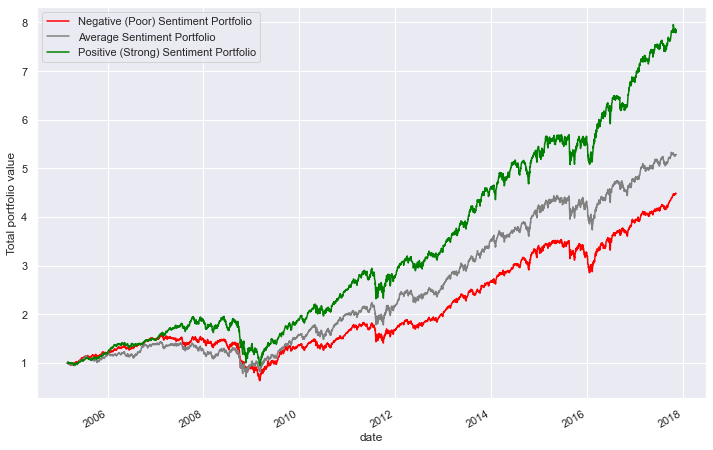

In [152]:
sentiment_returns_plusone[1].cumprod().plot(figsize=(12, 8), color ='red', label='Negative (Poor) Sentiment Portfolio')
sentiment_returns_plusone[2].cumprod().plot(figsize=(12, 8), color ='grey', label='Average Sentiment Portfolio')
sentiment_returns_plusone[3].cumprod().plot(figsize=(12, 8), color ='green', label='Positive (Strong) Sentiment Portfolio')
plt.ylabel('Total portfolio value')
plt.legend()

In [153]:
cumul_return = sentiment_returns_plusone.cumprod()

In [154]:
cumul_return

cluster_tone_rank,1.0,2.0,3.0
date,,,
2005-02-28,0.993279,0.996341,0.991738
2005-03-01,0.998147,1.005984,1.002081
2005-03-02,0.992854,1.007854,1.005253
2005-03-03,0.989613,1.012542,1.000169
2005-03-04,1.001086,1.022899,1.010430
...,...,...,...
2017-11-06,4.488618,5.276600,7.868388
2017-11-07,4.488711,5.279932,7.784854
2017-11-08,4.489646,5.286122,7.847053


In [155]:
# Estimating the tStat
mean_difference = (sentiment_returns[3] - sentiment_returns[1]).mean()
std_difference = (sentiment_returns[3] - sentiment_returns[1]).std()

In [156]:
t_stat = mean_difference / (std_difference / np.sqrt(len(sentiment_returns_plusone)))

In [157]:
# Check whether we can reject the null (i.e., if the t_stat >= 2)
t_stat

1.3921989394699135

In [158]:
results0 = stats.ttest_rel(sentiment_returns[3], sentiment_returns[1])
results0

Ttest_relResult(statistic=1.3921989394699177, pvalue=0.1639589033200563)

In [159]:
sentiment_returns_plusone

cluster_tone_rank,1.0,2.0,3.0
date,,,
2005-02-28,0.993279,0.996341,0.991738
2005-03-01,1.004901,1.009679,1.010429
2005-03-02,0.994697,1.001859,1.003166
2005-03-03,0.996735,1.004651,0.994942
2005-03-04,1.011594,1.010230,1.010260
...,...,...,...
2017-11-06,1.004889,1.004001,1.004096
2017-11-07,1.000021,1.000632,0.989384
2017-11-08,1.000208,1.001172,1.007990


In [160]:
years = sentiment_returns.index.year.unique()

In [161]:
years

Int64Index([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016, 2017],
           dtype='int64', name='date')

In [162]:
# Conver the year integers to strings to allow slicing later
years = [str(year) for year in years]

In [163]:
# Test the hypothesis for each year individually
yearly_results = {}
for year in years:
    df = sentiment_returns_plusone[year]
    results = stats.ttest_rel(df[3], df[1])
    yearly_results[year] = results

In [164]:
# Explore the yearly results
pd.DataFrame(yearly_results, index=['t_stat', 'pval'])

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
t_stat,0.044292,-0.139457,2.434187,0.567828,-0.349229,1.645738,0.777212,0.277912,0.448770,-1.127392,1.115114,0.179172,0.008897
pval,0.964713,0.889201,0.015626,0.570657,0.727210,0.101069,0.437766,0.781311,0.653985,0.260653,0.265868,0.857947,0.992910


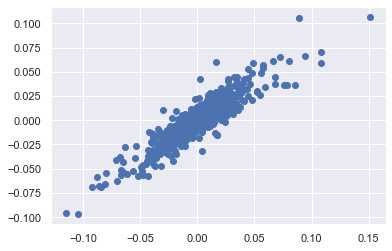

In [165]:
#correlation
from matplotlib import pyplot
x = sentiment_returns[1]
y = sentiment_returns[3]
pyplot.scatter(x,y)


C:\Users\Adrian\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='1.0', ylabel='3.0'>

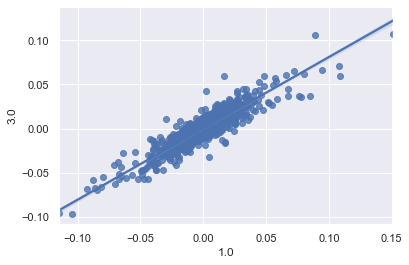

In [166]:
sns.regplot(x,y)

C:\Users\Adrian\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


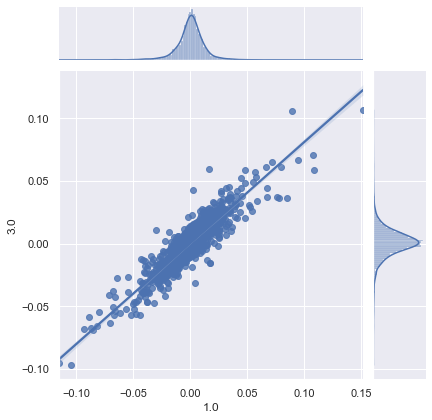

In [167]:
sns.jointplot(x, y, kind="reg");

In [168]:
sentiment_returns[1].mean()

0.0005721646779780242

In [169]:
sentiment_returns[1].std()

0.014396489547717314

In [170]:
sentiment_returns[3].mean()

0.0007255568009542711

In [171]:
sentiment_returns[3].std()

0.012888139297788688

In [172]:
from scipy.stats import linregress
linregress(x,y)

LinregressResult(slope=0.806971967838668, intercept=0.0002638359448385692, rvalue=0.9014151098043732, pvalue=0.0, stderr=0.006852832930052182)

In [173]:
testtt= (0.0005721646779780242 * 1.0069113086541281) - 0.000158406669973746
testtt

0.00041771241469477417

In [174]:
from scipy.stats import pearsonr
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.901
